In [1]:
# Adapted from https://github.com/rasmusab/bayesianprobabilitiesworkshop

The marketing department has done a pilot study and tried two different marketing methods:

A: Sending a mail with a colorful brochure that invites people to sign up for a one year salmon subscription.

B: Sending a colorful brochure that invites people to sign up for a one year salmon subscription and includes a free sample.

The marketing department sent out 75 mails of type A and 16 mails of type B. Six people that received a mail of type A signed up for one year of salmon, and ten people that received a mail of type B signed up.

The marketing department now wants to know, which method should we use, A or B?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

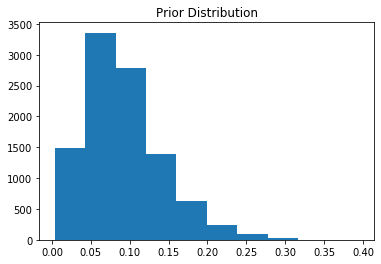

In [3]:
n = 10000

# An expert claims that the sign-up rate has never been higher than 20% and is usually between 5-15%. 
# We can use a beta distribution as our new prior to reflect the expert's opinion
prior = pd.Series(np.random.beta(3, 30, n))

ax = prior.hist(grid=False)
ax.set_title('Prior Distribution')
plt.show()

In [4]:
def generate_data(p):
    return np.random.binomial(75, p)

In [5]:
simulated_data = []
for p in prior:
    simulated_data.append(generate_data(p))

# only keep the probabilities that produced the outcome we observed for each method
a_observed = 6
b_observed = 10

a_posterior = prior[list(map(lambda x:x == a_observed, simulated_data))]
b_posterior = prior[list(map(lambda x:x == b_observed, simulated_data))]

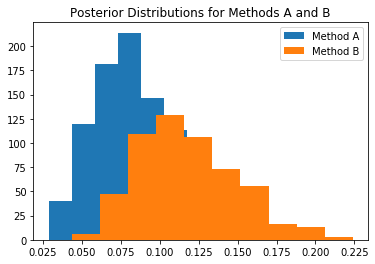

In [6]:
ax = a_posterior.hist(grid=False)
ax = b_posterior.hist(grid=False)
ax.legend(['Method A', 'Method B'])
ax.set_title('Posterior Distributions for Methods A and B')
plt.show()

In [7]:
# summarize both methods
print('Method A: mean = %.2f, median = %.2f, IQR = %.2f to %.2f' % (a_posterior.mean(), a_posterior.median(),  a_posterior.quantile([.25]).values[0], a_posterior.quantile([.75]).values[0]))
print('Method B: mean = %.2f, median = %.2f, IQR = %.2f to %.2f' % (b_posterior.mean(), b_posterior.median(),  b_posterior.quantile([.25]).values[0], b_posterior.quantile([.75]).values[0]))

Method A: mean = 0.08, median = 0.08, IQR = 0.07 to 0.10
Method B: mean = 0.12, median = 0.11, IQR = 0.10 to 0.14


Method B has a higher sign-up rate, so it seems like we should recommend Method B.  However, we find out that the cost of sending a brochure is \\$0.25, the cost of sending a sample is \\$5.50 and if a person signs up, the company makes \\$50 on average
Should we still recommend method B?

In [8]:
def calculate_profit(signup_rates, cost):
    profits = []
    for rate in signup_rates:
        profits.append(rate * 50 - cost)
    return profits

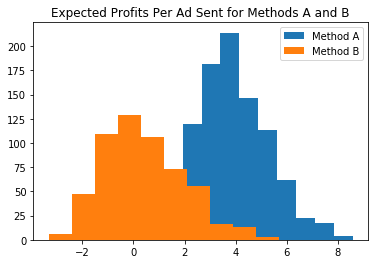

In [9]:
a_profits = pd.Series(calculate_profit(a_posterior, .25))
b_profits = pd.Series(calculate_profit(b_posterior, 5.5))

ax = a_profits.hist(grid=False)
ax = b_profits.hist(grid=False)
ax.legend(['Method A', 'Method B'])
ax.set_title('Expected Profits Per Ad Sent for Methods A and B')
plt.show()

In [10]:
# summarize both methods
print('Method A: mean = %.2f, median = %.2f, IQR = %.2f to %.2f' % (a_profits.mean(), a_profits.median(),  a_profits.quantile([.25]).values[0], a_profits.quantile([.75]).values[0]))
print('Method B: mean = %.2f, median = %.2f, IQR = %.2f to %.2f' % (b_profits.mean(), b_profits.median(),  b_profits.quantile([.25]).values[0], b_profits.quantile([.75]).values[0]))

Method A: mean = 3.96, median = 3.80, IQR = 3.03 to 4.80
Method B: mean = 0.40, median = 0.20, IQR = -0.74 to 1.41


**Conclusion:** Even though method A has a higher sign-up rate, the increase in sign-up rate isn't significant enough to justify the extra cost of sending a sample.  Method A is expected to bring in a profit of 3.79 per brochure sent while method B is expected to bring in .35 per sample sent.  With Method B, there is also a strong possibility that the company will lose money.  